In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os 
import numpy as np
import cv2 # image operations

# Some of the images are of different shape photos, some are landscape, some are portraits, square. We need to normalize with same shape.
# Features is in numbers but our labels/classifications are string Dogs/cats so we need to map this with numbers. Dog as 0 Cat as 1.
# Shuffle the dataset

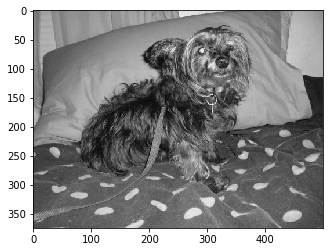

In [4]:
DATADIR = "G:\LEARNING\PythonLearning\datasets\kagglecatsanddogs_3367a\PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join( DATADIR, category )
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
        # why we are reading grayscale data becasue RGB data is 3 times grayscale data.
        # colors are not essential in this task as color is not differentiating factor between cats and dogs.
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

In [5]:
print(img_array)
# Some of the images are of different shape photos, some are landscape, some are portraits, square. We need to normalize.

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


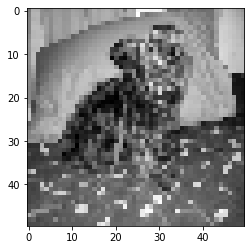

In [10]:
IMG_SIZE = 50 # Decide image size as 50 by 50 for all images.

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [12]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join( DATADIR, category )
        class_num = CATEGORIES.index( category )
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()
        
# Next things is Features is in numbers but our labels/classifications are string Dogs/cats so we need to map this with numbers. Dog as 0 Cat as 1.

In [13]:
print( len(training_data) )

24946


In [14]:
# you need to make sure you have just as many dogs just as many cats. 50-50
# Sometimes you can have different numbers and then we train them all and you can inform the model that these are all class weights.
# It attempts to handle your imbalance dataset. Balance the dataset, then it would be better.
# Next thing is shuffle the dataset otherwise it will learn properly.

import random
random.shuffle(training_data)

In [16]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
0
0
1
0
1


In [17]:
X = [] # feature data
y = [] # label data.
# Pack into the variable to feed in NN.
# You can also use built in methods to properly do sampling.

In [18]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # -1 is any number and 1 is a grayscale

In [20]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)

pickle_out.close()

In [21]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [25]:
X[1]

array([[[208],
        [210],
        [192],
        ...,
        [ 79],
        [ 73],
        [ 73]],

       [[ 94],
        [103],
        [111],
        ...,
        [ 90],
        [ 88],
        [ 80]],

       [[ 78],
        [ 81],
        [ 82],
        ...,
        [ 90],
        [ 89],
        [ 85]],

       ...,

       [[ 81],
        [ 86],
        [ 87],
        ...,
        [118],
        [115],
        [113]],

       [[ 81],
        [ 85],
        [ 91],
        ...,
        [121],
        [114],
        [111]],

       [[ 79],
        [ 84],
        [ 80],
        ...,
        [117],
        [114],
        [101]]], dtype=uint8)

In [8]:
# CNN - Convolution NN - you have convolutional window, just a sub part of picture. In that window, convolution is going to attempt to simplify
# what it finds down to some sort of value. when it does that the window is going to shift over and do the exact same thing jsut a bunch of time.
# It will produce features and do it many more time and generate buch of convolutions.
# Lets a pooling layer. Common pooling is max pooling. Max pooling of convolution window and find max value from that window to find convolution.
# HIgher level idea how this actually works - Slowly extracting values from images. So lower the initial layer in the convolution network are going
# to be finidng things like edges and lines and as you go you are gonna find circles, squares, small features ex watch deep dream of NN on you tube.
# In keras you can just specify the window size and thats it. - 
# More learning - practical machine learning.
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

import time

# Tensorboard = put light on whats going on in your model.
# if you want to run some models at the same time you can specify the fraction of the GPU for model to take up
# we are going to use callbacks class of keras for tensorboard. It has various functions:
# 1. modelcheckpoint - This is very useful. you can checkpoint a model. This can help to avoid model overfitting. Suppose you started with 100 epochs
# and your model can reach best loss and validation accuracy in 10-12 epochs. So you can save on various parameters.
# 2. Learning rate schedule

from tensorflow.keras.callbacks import TensorBoard

NAME = "Cats-vs-dog-cnn64x2-{}".format( int(time.time()) )

tensorboard = TensorBoard(log_dir='logs\{}'.format(NAME))

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))
y = np.array(y)

# Normalizing data. Easy way is Scale that data. 
# Easy way to scale data is to have min and max value and for image data we can have min =0 and max=255 for pixel data.
# we can actually dividde by 255 but keras has normalize fnction.

X = X / 255.0

model = Sequential()
model.add( Conv2D(64, (3,3), input_shape=X.shape[1:]) ) # Convolution layer
# Conv2d = Convolution layer
# Window = 3 by 3
# input_shape = we are skipping -1 (how many of those feature sets did we have we dont need that because thats not actually input shape, its gonna be the 
# shape of the data we are actually throwing in ex. X shape is (24946, 50, 50, 1) )
# Creating Convolution window and max pooling go together and pooling can be added in next step as well and then activation function.
# But lets go ahead with activation function first
model.add( Activation("relu") )
# Then max pooling
model.add( MaxPooling2D(pool_size=(2,2) ) )

# Lets add another Convolutional layer.
model.add( Conv2D(64, (3,3)) ) # Another Convolution layer
model.add( Activation("relu") )
model.add( MaxPooling2D(pool_size=(2,2) ) )

# Now we hav 2 by 64 layer convolutional network
# Now before this you need to flatten the data as Conv is 2d and Dense layer wants a 1d dataset.
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu")) # if you dont specify activation function, it becomes pretty much linear activation function 
# which is useless in this case as we are not doing any regression.

# outpput layer
model.add(Dense(1))
# then we need a activation function
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.fit(X, y, batch_size=32, validation_split=0.1, epochs=10, callbacks=[tensorboard])
# Batch size - How many at a time we need to pass. Sometime you need to send 1 at a time but you also dont want to pass all at the same time.
# its good to pass 20-200 but 1000s of batch sizee may end up with negative results. but it depends on the data size, if you have data size in
# billions then may you can start with batch of size of thousands.

# Even after 1 epoch we got around 73 percent of accuracy which is good. Lets add more epochs

# Tensorboard - Watch for accuracy, loss, validation accuracy and validation loss.
# In all cases you would see accuracy goes up and loss goes down.
# But if you see something like, after some epoch validation loss starting back up and val acc is still improving but its questionable that
# its really improving, may be its becasue of the samples may be we have much larger sample.
# Watch for validation loss always.
# I am more interested in out-sample rather than in-sample, becasue it is easy to cheat with in-sample.
# If better the in-sample looks than the out-sample, that is the worst model and that means over fitment is occuring.

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 132s 6ms/sample - loss: 0.6106 - accuracy: 0.6545 - val_loss: 0.5161 - val_accuracy: 0.7443
Epoch 2/10
22451/22451 [==============================] - 135s 6ms/sample - loss: 0.5041 - accuracy: 0.7569 - val_loss: 0.5047 - val_accuracy: 0.7475
Epoch 3/10
22451/22451 [==============================] - 143s 6ms/sample - loss: 0.4578 - accuracy: 0.7868 - val_loss: 0.4606 - val_accuracy: 0.7828
Epoch 4/10
22451/22451 [==============================] - 145s 6ms/sample - loss: 0.4210 - accuracy: 0.8052 - val_loss: 0.4679 - val_accuracy: 0.7824
Epoch 5/10
22451/22451 [==============================] - 133s 6ms/sample - loss: 0.3847 - accuracy: 0.8258 - val_loss: 0.4368 - val_accuracy: 0.7972
Epoch 6/10
22451/22451 [==============================] - 124s 6ms/sample - loss: 0.3471 - accuracy: 0.8474 - val_loss: 0.4252 - val_accuracy: 0.8028
Epoch 7/10
22451/22451 [===========================

# We can do much better than 80%. There are many things for tweaking. We can change:
# optimizer
# Learning Rate
# No of Dense layer and we can have them or we won't.
# Change how many units per layer that we want to have activation function.
# We could change kernel size.
# We could change stride.
# Decay rate
# There are many things which we can change and we should start with something simple.
# No of layers, nodes per layer, and dense layer or not

In [ ]:
#Optimizing the model.

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128] # usually what people do.
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

In [1]:
# CNN - Convolution NN - you have convolutional window, just a sub part of picture. In that window, convolution is going to attempt to simplify
# what it finds down to some sort of value. when it does that the window is going to shift over and do the exact same thing jsut a bunch of time.
# It will produce features and do it many more time and generate buch of convolutions.
# Lets a pooling layer. Common pooling is max pooling. Max pooling of convolution window and find max value from that window to find convolution.
# HIgher level idea how this actually works - Slowly extracting values from images. So lower the initial layer in the convolution network are going
# to be finidng things like edges and lines and as you go you are gonna find circles, squares, small features ex watch deep dream of NN on you tube.
# In keras you can just specify the window size and thats it. - 
# More learning - practical machine learning.
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

import time

# Tensorboard = put light on whats going on in your model.
# if you want to run some models at the same time you can specify the fraction of the GPU for model to take up
# we are going to use callbacks class of keras for tensorboard. It has various functions:
# 1. modelcheckpoint - This is very useful. you can checkpoint a model. This can help to avoid model overfitting. Suppose you started with 100 epochs
# and your model can reach best loss and validation accuracy in 10-12 epochs. So you can save on various parameters.
# 2. Learning rate schedule

from tensorflow.keras.callbacks import TensorBoard

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))
y = np.array(y)

# Normalizing data. Easy way is Scale that data. 
# Easy way to scale data is to have min and max value and for image data we can have min =0 and max=255 for pixel data.
# we can actually dividde by 255 but keras has normalize fnction.

X = X / 255.0

#Optimizing the model.

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128] # usually what people do.
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            tensorboard = TensorBoard(log_dir='logs\{}'.format(NAME))
            print(NAME)
            model = Sequential()
            
            model.add( Conv2D(64, (3,3), input_shape=X.shape[1:]) ) # Convolution layer
            # Conv2d = Convolution layer
            # Window = 3 by 3
            # input_shape = we are skipping -1 (how many of those feature sets did we have we dont need that because thats not actually input shape, its gonna be the 
            # shape of the data we are actually throwing in ex. X shape is (24946, 50, 50, 1) )
            # Creating Convolution window and max pooling go together and pooling can be added in next step as well and then activation function.
            # But lets go ahead with activation function first
            model.add( Activation("relu") )
            # Then max pooling
            model.add( MaxPooling2D(pool_size=(2,2) ) )
            
            for l in range(conv_layer-1): #-1 because we already got 1 layer above
                # Lets add another Convolutional layer.
                model.add( Conv2D(64, (3,3)) ) # Another Convolution layer
                model.add( Activation("relu") )
                model.add( MaxPooling2D(pool_size=(2,2) ) )

            # Now we hav 2 by 64 layer convolutional network
            # Now before this you need to flatten the data as Conv is 2d and Dense layer wants a 1d dataset.
            model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu")) # if you dont specify activation function, it becomes pretty much linear activation function 
                # which is useless in this case as we are not doing any regression.
                
            # outpput layer
            model.add(Dense(1))
            # then we need a activation function
            model.add(Activation("sigmoid"))

            model.compile(loss="binary_crossentropy",
                          optimizer="adam",
                          metrics=["accuracy"])

            model.fit(X, y, batch_size=32, validation_split=0.1, epochs=10, callbacks=[tensorboard])
            # Batch size - How many at a time we need to pass. Sometime you need to send 1 at a time but you also dont want to pass all at the same time.
            # its good to pass 20-200 but 1000s of batch sizee may end up with negative results. but it depends on the data size, if you have data size in
            # billions then may you can start with batch of size of thousands.

            # Even after 1 epoch we got around 73 percent of accuracy which is good. Lets add more epochs

            # Tensorboard - Watch for accuracy, loss, validation accuracy and validation loss.
            # In all cases you would see accuracy goes up and loss goes down.
            # But if you see something like, after some epoch validation loss starting back up and val acc is still improving but its questionable that
            # its really improving, may be its becasue of the samples may be we have much larger sample.
            # Watch for validation loss always.
            # I am more interested in out-sample rather than in-sample, becasue it is easy to cheat with in-sample.
            # If better the in-sample looks than the out-sample, that is the worst model and that means over fitment is occuring.

1-conv-32-nodes-0-dense-1589344585
Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 90s 4ms/sample - loss: 0.6158 - accuracy: 0.6598 - val_loss: 0.5730 - val_accuracy: 0.7118
Epoch 2/10
22451/22451 [==============================] - 84s 4ms/sample - loss: 0.5400 - accuracy: 0.7291 - val_loss: 0.5468 - val_accuracy: 0.7307
Epoch 3/10
22451/22451 [==============================] - 86s 4ms/sample - loss: 0.5077 - accuracy: 0.7548 - val_loss: 0.5363 - val_accuracy: 0.7375
Epoch 4/10
22451/22451 [==============================] - 95s 4ms/sample - loss: 0.4843 - accuracy: 0.7698 - val_loss: 0.5395 - val_accuracy: 0.7427
Epoch 5/10
22451/22451 [==============================] - 88s 4ms/sample - loss: 0.4674 - accuracy: 0.7832 - val_loss: 0.5274 - val_accuracy: 0.7447
Epoch 6/10
22451/22451 [==============================] - 88s 4ms/sample - loss: 0.4511 - accuracy: 0.7901 - val_loss: 0.5272 - val_accuracy: 0.7483
Epoch 7/10
22451/22451

##### After completing this, lets go to tensorboard
##### Check the end of loss and look at the best ones.
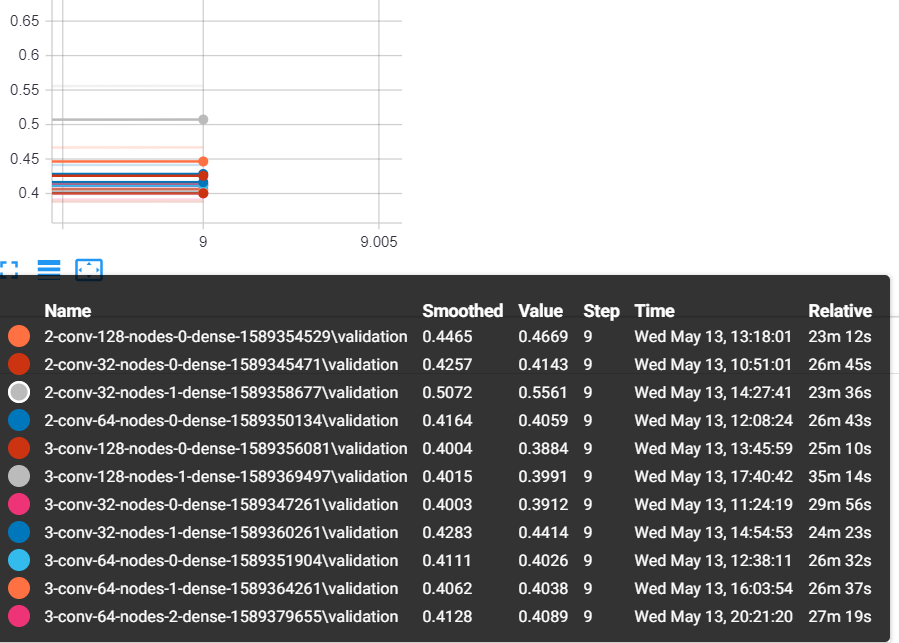
##### It's quite evident that 3 conv layer is clear winner.
##### Best is with 0 dense layer.
##### But its all hit and trial.
##### Try for more with 256 or 512

In [1]:
# CNN - Convolution NN - you have convolutional window, just a sub part of picture. In that window, convolution is going to attempt to simplify
# what it finds down to some sort of value. when it does that the window is going to shift over and do the exact same thing jsut a bunch of time.
# It will produce features and do it many more time and generate buch of convolutions.
# Lets a pooling layer. Common pooling is max pooling. Max pooling of convolution window and find max value from that window to find convolution.
# HIgher level idea how this actually works - Slowly extracting values from images. So lower the initial layer in the convolution network are going
# to be finidng things like edges and lines and as you go you are gonna find circles, squares, small features ex watch deep dream of NN on you tube.
# In keras you can just specify the window size and thats it. - 
# More learning - practical machine learning.
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

import time

# Tensorboard = put light on whats going on in your model.
# if you want to run some models at the same time you can specify the fraction of the GPU for model to take up
# we are going to use callbacks class of keras for tensorboard. It has various functions:
# 1. modelcheckpoint - This is very useful. you can checkpoint a model. This can help to avoid model overfitting. Suppose you started with 100 epochs
# and your model can reach best loss and validation accuracy in 10-12 epochs. So you can save on various parameters.
# 2. Learning rate schedule

from tensorflow.keras.callbacks import TensorBoard

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))
y = np.array(y)

# Normalizing data. Easy way is Scale that data. 
# Easy way to scale data is to have min and max value and for image data we can have min =0 and max=255 for pixel data.
# we can actually dividde by 255 but keras has normalize fnction.

X = X / 255.0

#Optimizing the model.

dense_layers = [0]
layer_sizes = [64] # usually what people do.
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            tensorboard = TensorBoard(log_dir='logs\{}'.format(NAME))
            print(NAME)
            model = Sequential()
            
            model.add( Conv2D(64, (3,3), input_shape=X.shape[1:]) ) # Convolution layer
            # Conv2d = Convolution layer
            # Window = 3 by 3
            # input_shape = we are skipping -1 (how many of those feature sets did we have we dont need that because thats not actually input shape, its gonna be the 
            # shape of the data we are actually throwing in ex. X shape is (24946, 50, 50, 1) )
            # Creating Convolution window and max pooling go together and pooling can be added in next step as well and then activation function.
            # But lets go ahead with activation function first
            model.add( Activation("relu") )
            # Then max pooling
            model.add( MaxPooling2D(pool_size=(2,2) ) )
            
            for l in range(conv_layer-1): #-1 because we already got 1 layer above
                # Lets add another Convolutional layer.
                model.add( Conv2D(64, (3,3)) ) # Another Convolution layer
                model.add( Activation("relu") )
                model.add( MaxPooling2D(pool_size=(2,2) ) )

            # Now we hav 2 by 64 layer convolutional network
            # Now before this you need to flatten the data as Conv is 2d and Dense layer wants a 1d dataset.
            model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu")) # if you dont specify activation function, it becomes pretty much linear activation function 
                # which is useless in this case as we are not doing any regression.
                
            # outpput layer
            model.add(Dense(1))
            # then we need a activation function
            model.add(Activation("sigmoid"))

            model.compile(loss="binary_crossentropy",
                          optimizer="adam",
                          metrics=["accuracy"])

            model.fit(X, y, batch_size=32, validation_split=0.1, epochs=10, callbacks=[tensorboard])
            # Batch size - How many at a time we need to pass. Sometime you need to send 1 at a time but you also dont want to pass all at the same time.
            # its good to pass 20-200 but 1000s of batch sizee may end up with negative results. but it depends on the data size, if you have data size in
            # billions then may you can start with batch of size of thousands.

            # Even after 1 epoch we got around 73 percent of accuracy which is good. Lets add more epochs

            # Tensorboard - Watch for accuracy, loss, validation accuracy and validation loss.
            # In all cases you would see accuracy goes up and loss goes down.
            # But if you see something like, after some epoch validation loss starting back up and val acc is still improving but its questionable that
            # its really improving, may be its becasue of the samples may be we have much larger sample.
            # Watch for validation loss always.
            # I am more interested in out-sample rather than in-sample, becasue it is easy to cheat with in-sample.
            # If better the in-sample looks than the out-sample, that is the worst model and that means over fitment is occuring.

# Lets save the model
model.save("64x3-CNN.model")

3-conv-64-nodes-0-dense-1589569078
Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 247s 11ms/sample - loss: 0.6299 - accuracy: 0.6326 - val_loss: 0.5627 - val_accuracy: 0.7102
Epoch 2/10
22451/22451 [==============================] - 242s 11ms/sample - loss: 0.5315 - accuracy: 0.7357 - val_loss: 0.5085 - val_accuracy: 0.7535
Epoch 3/10
22451/22451 [==============================] - 241s 11ms/sample - loss: 0.4790 - accuracy: 0.7688 - val_loss: 0.4948 - val_accuracy: 0.7571
Epoch 4/10
22451/22451 [==============================] - 241s 11ms/sample - loss: 0.4416 - accuracy: 0.7957 - val_loss: 0.4597 - val_accuracy: 0.7864
Epoch 5/10
22451/22451 [==============================] - 244s 11ms/sample - loss: 0.4121 - accuracy: 0.8105 - val_loss: 0.4500 - val_accuracy: 0.7940
Epoch 6/10
22451/22451 [==============================] - 248s 11ms/sample - loss: 0.3822 - accuracy: 0.8269 - val_loss: 0.4010 - val_accuracy: 0.8232
Epoch 7/10

In [5]:
import cv2
import tensorflow as tf

CATEGORIES = ["Dog", "Cat"]

def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict(prepare("IMG1.jpg"))
print( prediction )

[[0.]]


In [6]:
prediction = model.predict(prepare("IMG1.jpg"))
print( CATEGORIES[ int(prediction[0][0]) ] )

Dog


In [7]:
prediction = model.predict(prepare("IMG2.jpg"))
print( CATEGORIES[ int(prediction[0][0]) ] )

Dog
